<a href="https://colab.research.google.com/github/li0ne/q-macro-2ndhalf/blob/main/Quantmacro2024_assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Productivity states (h): [0.23457029 1.0512711 ]
Transition matrix (pi):
 [[0.61153934 0.38846066]
 [0.11186553 0.88813447]]
Parameters set.


<ipython-input-8-994ed06cbff7>:134: RuntimeWarning: invalid value encountered in divide
  plt.plot(a, aplus[:, 0] / a, label='Low Productivity (h_L)', color='blue')
<ipython-input-8-994ed06cbff7>:135: RuntimeWarning: divide by zero encountered in divide
  plt.plot(a, aplus[:, 1] / a, label='High Productivity (h_H)', color='red')


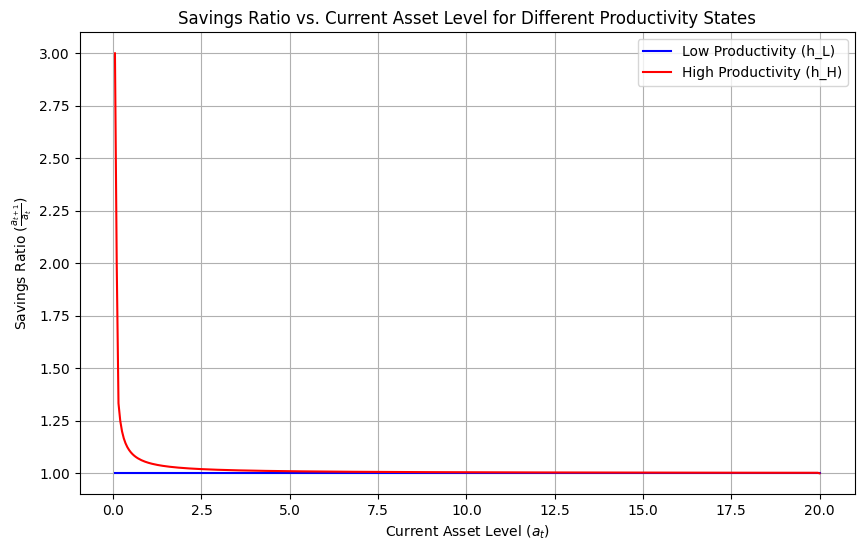

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def tauchen(n, mu, rho, sigma):
    m = 1 / np.sqrt(1 - rho**2)
    state_space = np.linspace(mu - m*sigma, mu + m*sigma, n)
    d = (state_space[n-1] - state_space[0]) / (n-1)
    transition_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if j == 0:
                transition_matrix[i, 0] = norm.cdf((state_space[0] - rho*state_space[i] + d/2)/sigma)
            elif j == n-1:
                transition_matrix[i, n-1] = 1.0 - norm.cdf((state_space[n-1] - rho*state_space[i] - d/2)/sigma)
            else:
                transition_matrix[i, j] = norm.cdf((state_space[j] - rho*state_space[i] + d/2)/sigma) - norm.cdf((state_space[j] - rho*state_space[i] - d/2)/sigma)

    return transition_matrix, state_space

# Parameters for the Markov process
rho = 0.6
sigma_eps = 0.6
mu = -0.7
n = 2

# Generate the transition matrix and state space
pi, log_h = tauchen(n, mu, rho, sigma_eps)
h = np.exp(log_h)
print("Productivity states (h):", h)
print("Transition matrix (pi):\n", pi)

def setPar(
    sigma=1.5,
    beta=0.98,
    rho=0.6,
    sigma_eps=0.6,
    a_l=0,
    a_u=20,
    NA=401,
    NH=2,
    mu_h=-0.7,
    alpha=0.25,
    delta=0.03,
):
    pi, h = tauchen(NH, mu_h, rho, sigma_eps)
    h = np.exp(h)

    param = {
        'sigma': sigma,
        'beta': beta,
        'pi': pi,
        'h': h,
        'NA': NA,
        'NH': NH,
        'a_l': a_l,
        'a_u': a_u,
        'alpha': alpha,
        'delta': delta,
    }

    return param

# Set parameters
param = setPar()
print("Parameters set.")

def solve_household(param, r, w):
    NA = param['NA']
    NH = param['NH']
    h = param['h']
    a_l = param['a_l']
    a_u = param['a_u']
    sigma = param['sigma']
    beta = param['beta']
    pi = param['pi']

    a = np.linspace(a_l, a_u, NA)

    util = np.full((NA, NA, NH), -10000.0)
    for ia in range(NA):
        for ih in range(NH):
            for iap in range(NA):
                cons = w * h[ih] + (1.0 + r) * a[ia] - a[iap]
                if cons > 0:
                    util[iap, ia, ih] = cons ** (1.0 - sigma) / (1.0 - sigma)

    v = np.zeros((NA, NH))
    c = np.zeros((NA, NH))
    aplus = np.zeros((NA, NH))
    v_new = np.zeros((NA, NH))
    iaplus = np.full((NA, NH), -10000)

    tol = 1e-6
    test = 10.0
    reward = np.zeros((NA, NA, NH))

    while test > tol:
        for ia in range(NA):
            for ih in range(NH):
                reward[:, ia, ih] = util[:, ia, ih]
                for ihp in range(NH):
                    reward[:, ia, ih] += beta * pi[ih, ihp] * v[:, ihp]

                v_new[ia, ih] = np.max(reward[:, ia, ih])
                iaplus[ia, ih] = np.argmax(reward[:, ia, ih])

        test = np.max(abs(v_new - v))
        v = v_new

    aplus = a[iaplus]

    for ia in range(NA):
        for ih in range(NH):
            c[ia, ih] = w * h[ih] + (1.0 + r) * a[ia] - aplus[ia, ih]

    return aplus, iaplus, c

r = 0.04
w = 1

decisions = solve_household(param, r, w)
aplus, _, c = decisions


a_l = param['a_l']
a_u = param['a_u']
NA = param['NA']
a = np.linspace(a_l, a_u, NA)

plt.figure(figsize=(10, 6))

plt.plot(a, aplus[:, 0] / a, label='Low Productivity (h_L)', color='blue')
plt.plot(a, aplus[:, 1] / a, label='High Productivity (h_H)', color='red')
plt.xlabel("Current Asset Level ($a_t$)")
plt.ylabel("Savings Ratio ($\\frac{a_{t+1}}{a_t}$)")
plt.title('Savings Ratio vs. Current Asset Level for Different Productivity States')
plt.legend()
plt.grid(True)
plt.show()


Iteration 100, test: 0.05142105341460734
Iteration 200, test: 0.006819430564590334
Iteration 300, test: 0.0009043898529412786
Iteration 400, test: 0.00011993978066371369
Iteration 500, test: 1.5906360452788704e-05
Iteration 600, test: 2.1094944671062876e-06
Iteration 100, test: 0.030415418662482097
Iteration 200, test: 0.004025970135202783
Iteration 300, test: 0.0005339208321579747
Iteration 400, test: 7.080834333095254e-05
Iteration 500, test: 9.390571051426377e-06
Iteration 600, test: 1.245373368874425e-06


<ipython-input-2-dc202e548fd7>:170: RuntimeWarning: invalid value encountered in divide
  plt.plot(a, aplus_no_tax[:, 0] / a, label='Low productivity (no tax)')
<ipython-input-2-dc202e548fd7>:171: RuntimeWarning: divide by zero encountered in divide
  plt.plot(a, aplus_no_tax[:, 1] / a, label='High productivity (no tax)')
<ipython-input-2-dc202e548fd7>:172: RuntimeWarning: invalid value encountered in divide
  plt.plot(a, aplus_with_tax[:, 0] / a, label='Low productivity (with tax)')
<ipython-input-2-dc202e548fd7>:173: RuntimeWarning: divide by zero encountered in divide
  plt.plot(a, aplus_with_tax[:, 1] / a, label='High productivity (with tax)')


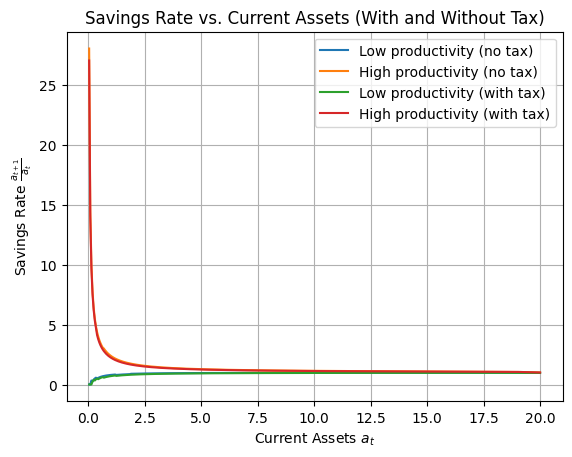

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Define the tauchen function with two states
def tauchen_two_state(rho, sigma_eps):
    h_mean = 0
    h_std = sigma_eps / np.sqrt(1 - rho**2)

    h_L = h_mean - h_std
    h_H = h_mean + h_std

    transition_matrix = np.array([
        [0.5 + 0.5 * norm.cdf((h_L - rho * h_H) / sigma_eps), 0.5 - 0.5 * norm.cdf((h_L - rho * h_H) / sigma_eps)],
        [0.5 + 0.5 * norm.cdf((h_H - rho * h_L) / sigma_eps), 0.5 - 0.5 * norm.cdf((h_H - rho * h_L) / sigma_eps)]
    ])

    return np.array([h_L, h_H]), transition_matrix

# Parameters
sigma = 1.5
beta = 0.98
rho = 0.6
sigma_eps = 0.6
r = 0.04
w = 1
a_l = 0
a_u = 20
NA = 401
NH = 2
tau_k = 0.3

# Create productivity grid and transition matrix
h, pi = tauchen_two_state(rho, sigma_eps)
h = np.exp(h)  # Convert to levels

# Define the utility function
def utility(c, sigma):
    return (c**(1 - sigma) - 1) / (1 - sigma) if c > 0 else -np.inf

# Solve the household problem without tax
def solve_household(param, r, w):
    NA = param['NA']
    NH = param['NH']
    h = param['h']
    a_l = param['a_l']
    a_u = param['a_u']
    sigma = param['sigma']
    beta = param['beta']
    pi = param['pi']

    a = np.linspace(a_l, a_u, NA)
    util = np.full((NA, NA, NH), -np.inf)
    for ia in range(NA):
        for ih in range(NH):
            for iap in range(NA):
                cons = w * h[ih] + (1.0 + r) * a[ia] - a[iap]
                if cons > 0:
                    util[iap, ia, ih] = utility(cons, sigma)

    v = np.zeros((NA, NH))
    c = np.zeros((NA, NH))
    aplus = np.zeros((NA, NH))
    v_new = np.zeros((NA, NH))
    iaplus = np.full((NA, NH), -10000)
    tol = 1e-6
    test = 10.0
    reward = np.zeros((NA, NA, NH))
    max_iter = 1000
    iter_count = 0

    while test > tol and iter_count < max_iter:
        for ia in range(NA):
            for ih in range(NH):
                reward[:, ia, ih] = util[:, ia, ih]
                for ihp in range(NH):
                    reward[:, ia, ih] += beta * pi[ih, ihp] * v[:, ihp]
                v_new[ia, ih] = np.max(reward[:, ia, ih])
                iaplus[ia, ih] = np.argmax(reward[:, ia, ih])
        test = np.max(abs(v_new - v))
        v = v_new.copy()
        iter_count += 1
        if iter_count % 100 == 0:
            print(f"Iteration {iter_count}, test: {test}")

    if iter_count == max_iter:
        print("Warning: Maximum iterations reached without convergence.")

    aplus = a[iaplus]
    for ia in range(NA):
        for ih in range(NH):
            c[ia, ih] = w * h[ih] + (1.0 + r) * a[ia] - aplus[ia, ih]
    return aplus, iaplus, c

# Solve the household problem with capital income tax
def solve_household_tax(param, r, w, tau_k):
    NA = param['NA']
    NH = param['NH']
    h = param['h']
    a_l = param['a_l']
    a_u = param['a_u']
    sigma = param['sigma']
    beta = param['beta']
    pi = param['pi']

    a = np.linspace(a_l, a_u, NA)
    util = np.full((NA, NA, NH), -np.inf)
    for ia in range(NA):
        for ih in range(NH):
            for iap in range(NA):
                cons = w * h[ih] + (1.0 + (1 - tau_k) * r) * a[ia] - a[iap]
                if cons > 0:
                    util[iap, ia, ih] = utility(cons, sigma)

    v = np.zeros((NA, NH))
    c = np.zeros((NA, NH))
    aplus = np.zeros((NA, NH))
    v_new = np.zeros((NA, NH))
    iaplus = np.full((NA, NH), -10000)
    tol = 1e-6
    test = 10.0
    reward = np.zeros((NA, NA, NH))
    max_iter = 1000
    iter_count = 0

    while test > tol and iter_count < max_iter:
        for ia in range(NA):
            for ih in range(NH):
                reward[:, ia, ih] = util[:, ia, ih]
                for ihp in range(NH):
                    reward[:, ia, ih] += beta * pi[ih, ihp] * v[:, ihp]
                v_new[ia, ih] = np.max(reward[:, ia, ih])
                iaplus[ia, ih] = np.argmax(reward[:, ia, ih])
        test = np.max(abs(v_new - v))
        v = v_new.copy()
        iter_count += 1
        if iter_count % 100 == 0:
            print(f"Iteration {iter_count}, test: {test}")

    if iter_count == max_iter:
        print("Warning: Maximum iterations reached without convergence.")

    aplus = a[iaplus]
    for ia in range(NA):
        for ih in range(NH):
            c[ia, ih] = w * h[ih] + (1.0 + (1 - tau_k) * r) * a[ia] - aplus[ia, ih]
    return aplus, iaplus, c

# Parameters dictionary
param = {
    'sigma': sigma,
    'beta': beta,
    'pi': pi,
    'h': h,
    'NA': NA,
    'NH': NH,
    'a_l': a_l,
    'a_u': a_u,
}

# Solve the household problem without tax
aplus_no_tax, iaplus_no_tax, c_no_tax = solve_household(param, r, w)

# Solve the household problem with tax
aplus_with_tax, iaplus_with_tax, c_with_tax = solve_household_tax(param, r, w, tau_k)

# Plot the savings rate without and with tax
a = np.linspace(a_l, a_u, NA)

plt.plot(a, aplus_no_tax[:, 0] / a, label='Low productivity (no tax)')
plt.plot(a, aplus_no_tax[:, 1] / a, label='High productivity (no tax)')
plt.plot(a, aplus_with_tax[:, 0] / a, label='Low productivity (with tax)')
plt.plot(a, aplus_with_tax[:, 1] / a, label='High productivity (with tax)')
plt.xlabel("Current Assets $a_t$")
plt.ylabel("Savings Rate $\\frac{a_{t+1}}{a_t}$")
plt.title("Savings Rate vs. Current Assets (With and Without Tax)")
plt.legend()
plt.grid(True)
plt.show()


Iteration 100, test: 0.05142105341460734
Iteration 200, test: 0.006819430564590334
Iteration 300, test: 0.0009043898529412786
Iteration 400, test: 0.00011993978066371369
Iteration 500, test: 1.5906360452788704e-05
Iteration 600, test: 2.1094944671062876e-06
Iteration 100, test: 0.09972685804506654
Iteration 200, test: 0.013225731617694692
Iteration 300, test: 0.0017539906535333216
Iteration 400, test: 0.00023261346153446993
Iteration 500, test: 3.084909398154423e-05
Iteration 600, test: 4.091193162025775e-06


<ipython-input-3-6dae13e9d2bc>:116: RuntimeWarning: invalid value encountered in divide
  plt.plot(a, aplus_no_tax[:, 0] / a, label='Low productivity (no subsidy)')
<ipython-input-3-6dae13e9d2bc>:117: RuntimeWarning: divide by zero encountered in divide
  plt.plot(a, aplus_no_tax[:, 1] / a, label='High productivity (no subsidy)')
<ipython-input-3-6dae13e9d2bc>:118: RuntimeWarning: invalid value encountered in divide
  plt.plot(a, aplus_with_subsidy[:, 0] / a, label='Low productivity (with subsidy)')
<ipython-input-3-6dae13e9d2bc>:119: RuntimeWarning: divide by zero encountered in divide
  plt.plot(a, aplus_with_subsidy[:, 1] / a, label='High productivity (with subsidy)')


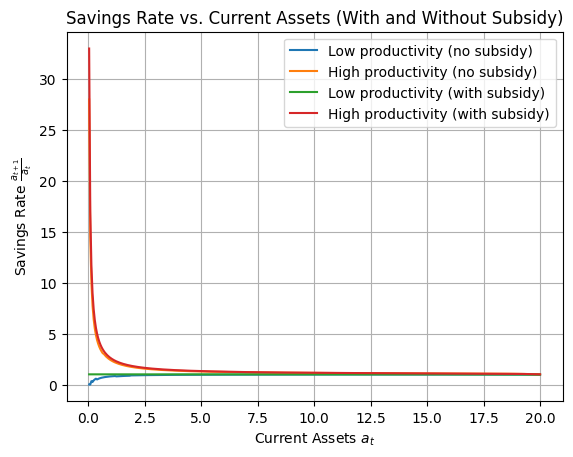

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Define the tauchen function with two states
def tauchen_two_state(rho, sigma_eps):
    h_mean = 0
    h_std = sigma_eps / np.sqrt(1 - rho**2)

    h_L = h_mean - h_std
    h_H = h_mean + h_std

    transition_matrix = np.array([
        [0.5 + 0.5 * norm.cdf((h_L - rho * h_H) / sigma_eps), 0.5 - 0.5 * norm.cdf((h_L - rho * h_H) / sigma_eps)],
        [0.5 + 0.5 * norm.cdf((h_H - rho * h_L) / sigma_eps), 0.5 - 0.5 * norm.cdf((h_H - rho * h_L) / sigma_eps)]
    ])

    return np.array([h_L, h_H]), transition_matrix

# Parameters
sigma = 1.5
beta = 0.98
rho = 0.6
sigma_eps = 0.6
r = 0.04
w = 1
a_l = 0
a_u = 20
NA = 401
NH = 2
T = 1  # Lump-sum subsidy

# Create productivity grid and transition matrix
h, pi = tauchen_two_state(rho, sigma_eps)
h = np.exp(h)  # Convert to levels

# Define the utility function
def utility(c, sigma):
    return (c**(1 - sigma) - 1) / (1 - sigma) if c > 0 else -np.inf

# Solve the household problem with lump-sum subsidy
def solve_household_subsidy(param, r, w, T):
    NA = param['NA']
    NH = param['NH']
    h = param['h']
    a_l = param['a_l']
    a_u = param['a_u']
    sigma = param['sigma']
    beta = param['beta']
    pi = param['pi']

    a = np.linspace(a_l, a_u, NA)
    util = np.full((NA, NA, NH), -np.inf)
    for ia in range(NA):
        for ih in range(NH):
            for iap in range(NA):
                cons = w * h[ih] + (1.0 + r) * a[ia] + T - a[iap]
                if cons > 0:
                    util[iap, ia, ih] = utility(cons, sigma)

    v = np.zeros((NA, NH))
    c = np.zeros((NA, NH))
    aplus = np.zeros((NA, NH))
    v_new = np.zeros((NA, NH))
    iaplus = np.full((NA, NH), -10000)
    tol = 1e-6
    test = 10.0
    reward = np.zeros((NA, NA, NH))
    max_iter = 1000
    iter_count = 0

    while test > tol and iter_count < max_iter:
        for ia in range(NA):
            for ih in range(NH):
                reward[:, ia, ih] = util[:, ia, ih]
                for ihp in range(NH):
                    reward[:, ia, ih] += beta * pi[ih, ihp] * v[:, ihp]
                v_new[ia, ih] = np.max(reward[:, ia, ih])
                iaplus[ia, ih] = np.argmax(reward[:, ia, ih])
        test = np.max(abs(v_new - v))
        v = v_new.copy()
        iter_count += 1
        if iter_count % 100 == 0:
            print(f"Iteration {iter_count}, test: {test}")

    if iter_count == max_iter:
        print("Warning: Maximum iterations reached without convergence.")

    aplus = a[iaplus]
    for ia in range(NA):
        for ih in range(NH):
            c[ia, ih] = w * h[ih] + (1.0 + r) * a[ia] + T - aplus[ia, ih]
    return aplus, iaplus, c

# Parameters dictionary
param = {
    'sigma': sigma,
    'beta': beta,
    'pi': pi,
    'h': h,
    'NA': NA,
    'NH': NH,
    'a_l': a_l,
    'a_u': a_u,
}

# Solve the household problem without tax
aplus_no_tax, iaplus_no_tax, c_no_tax = solve_household(param, r, w)

# Solve the household problem with subsidy
aplus_with_subsidy, iaplus_with_subsidy, c_with_subsidy = solve_household_subsidy(param, r, w, T)

# Plot the savings rate without and with subsidy
a = np.linspace(a_l, a_u, NA)

plt.plot(a, aplus_no_tax[:, 0] / a, label='Low productivity (no subsidy)')
plt.plot(a, aplus_no_tax[:, 1] / a, label='High productivity (no subsidy)')
plt.plot(a, aplus_with_subsidy[:, 0] / a, label='Low productivity (with subsidy)')
plt.plot(a, aplus_with_subsidy[:, 1] / a, label='High productivity (with subsidy)')
plt.xlabel("Current Assets $a_t$")
plt.ylabel("Savings Rate $\\frac{a_{t+1}}{a_t}$")
plt.title("Savings Rate vs. Current Assets (With and Without Subsidy)")
plt.legend()
plt.grid(True)
plt.show()


Iteration 100, test: 0.05142105341460734
Iteration 200, test: 0.006819430564590334
Iteration 300, test: 0.0009043898529412786
Iteration 400, test: 0.00011993978066371369
Iteration 500, test: 1.5906360452788704e-05
Iteration 600, test: 2.1094944671062876e-06


<ipython-input-4-29af1105cf2c>:128: RuntimeWarning: invalid value encountered in divide
  plt.plot(a, aplus_original[:, 0] / a, label='Low productivity (original beta)')
<ipython-input-4-29af1105cf2c>:129: RuntimeWarning: divide by zero encountered in divide
  plt.plot(a, aplus_original[:, 1] / a, label='High productivity (original beta)')
<ipython-input-4-29af1105cf2c>:130: RuntimeWarning: invalid value encountered in divide
  plt.plot(a, aplus_low[:, 0] / a, label='Low productivity (low beta)')
<ipython-input-4-29af1105cf2c>:131: RuntimeWarning: invalid value encountered in divide
  plt.plot(a, aplus_low[:, 1] / a, label='High productivity (low beta)')


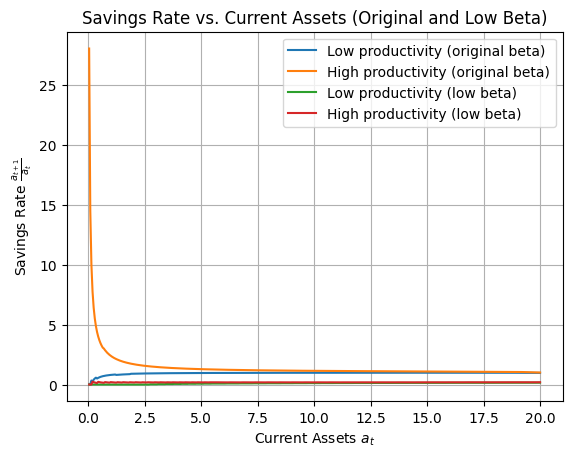

In [4]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Define the tauchen function with two states
def tauchen_two_state(rho, sigma_eps):
    h_mean = 0
    h_std = sigma_eps / np.sqrt(1 - rho**2)

    h_L = h_mean - h_std
    h_H = h_mean + h_std

    transition_matrix = np.array([
        [0.5 + 0.5 * norm.cdf((h_L - rho * h_H) / sigma_eps), 0.5 - 0.5 * norm.cdf((h_L - rho * h_H) / sigma_eps)],
        [0.5 + 0.5 * norm.cdf((h_H - rho * h_L) / sigma_eps), 0.5 - 0.5 * norm.cdf((h_H - rho * h_L) / sigma_eps)]
    ])

    return np.array([h_L, h_H]), transition_matrix

# Parameters
sigma = 1.5
beta_original = 0.98
beta_low = 0.1
rho = 0.6
sigma_eps = 0.6
r = 0.04
w = 1
a_l = 0
a_u = 20
NA = 401
NH = 2

# Create productivity grid and transition matrix
h, pi = tauchen_two_state(rho, sigma_eps)
h = np.exp(h)  # Convert to levels

# Define the utility function
def utility(c, sigma):
    return (c**(1 - sigma) - 1) / (1 - sigma) if c > 0 else -np.inf

# Solve the household problem
def solve_household(param, r, w):
    NA = param['NA']
    NH = param['NH']
    h = param['h']
    a_l = param['a_l']
    a_u = param['a_u']
    sigma = param['sigma']
    beta = param['beta']
    pi = param['pi']

    a = np.linspace(a_l, a_u, NA)
    util = np.full((NA, NA, NH), -np.inf)
    for ia in range(NA):
        for ih in range(NH):
            for iap in range(NA):
                cons = w * h[ih] + (1.0 + r) * a[ia] - a[iap]
                if cons > 0:
                    util[iap, ia, ih] = utility(cons, sigma)

    v = np.zeros((NA, NH))
    c = np.zeros((NA, NH))
    aplus = np.zeros((NA, NH))
    v_new = np.zeros((NA, NH))
    iaplus = np.full((NA, NH), -10000)
    tol = 1e-6
    test = 10.0
    reward = np.zeros((NA, NA, NH))
    max_iter = 1000
    iter_count = 0

    while test > tol and iter_count < max_iter:
        for ia in range(NA):
            for ih in range(NH):
                reward[:, ia, ih] = util[:, ia, ih]
                for ihp in range(NH):
                    reward[:, ia, ih] += beta * pi[ih, ihp] * v[:, ihp]
                v_new[ia, ih] = np.max(reward[:, ia, ih])
                iaplus[ia, ih] = np.argmax(reward[:, ia, ih])
        test = np.max(abs(v_new - v))
        v = v_new.copy()
        iter_count += 1
        if iter_count % 100 == 0:
            print(f"Iteration {iter_count}, test: {test}")

    if iter_count == max_iter:
        print("Warning: Maximum iterations reached without convergence.")

    aplus = a[iaplus]
    for ia in range(NA):
        for ih in range(NH):
            c[ia, ih] = w * h[ih] + (1.0 + r) * a[ia] - aplus[ia, ih]
    return aplus, iaplus, c

# Parameters dictionary for original beta
param_original = {
    'sigma': sigma,
    'beta': beta_original,
    'pi': pi,
    'h': h,
    'NA': NA,
    'NH': NH,
    'a_l': a_l,
    'a_u': a_u,
}

# Parameters dictionary for low beta
param_low = {
    'sigma': sigma,
    'beta': beta_low,
    'pi': pi,
    'h': h,
    'NA': NA,
    'NH': NH,
    'a_l': a_l,
    'a_u': a_u,
}

# Solve the household problem for original beta
aplus_original, iaplus_original, c_original = solve_household(param_original, r, w)

# Solve the household problem for low beta
aplus_low, iaplus_low, c_low = solve_household(param_low, r, w)

# Plot the savings rate for original and low beta
a = np.linspace(a_l, a_u, NA)

plt.plot(a, aplus_original[:, 0] / a, label='Low productivity (original beta)')
plt.plot(a, aplus_original[:, 1] / a, label='High productivity (original beta)')
plt.plot(a, aplus_low[:, 0] / a, label='Low productivity (low beta)')
plt.plot(a, aplus_low[:, 1] / a, label='High productivity (low beta)')
plt.xlabel("Current Assets $a_t$")
plt.ylabel("Savings Rate $\\frac{a_{t+1}}{a_t}$")
plt.title("Savings Rate vs. Current Assets (Original and Low Beta)")
plt.legend()
plt.grid(True)
plt.show()
